<img src="images/olympic.jpg" alt="Alternative text" />

# 🏋️‍♀️ OLYMPIC GAME HISTORY ANALYSIS 🏋️‍♀️

## Conda environment creation
conda create --prefix ./env pandas numpy matplotlib jupyter scikit-learn plotly

## DATASET

### Download
https://www.kaggle.com/code/nehagupta09/olympic-analysis-till-2016



### Context
This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. The data was scraped from www.sports-reference.com in May 2018.

Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered.

### Data dictionary
The file athlete_events.csv contains 271116 rows and 15 columns

* ID - Unique number for each athlete
* Name - Athlete's name
* Sex - M or F
* Age - Integer
* Height - In centimeters
* Weight - In kilograms
* Team - Team name
* NOC - National Olympic Committee 3-letter code
* Games - Year and season
* Year - Integer
* Season - Summer or Winter
* City - Host city
* Sport - Sport
* Event - Event
* Medal - Gold, Silver, Bronze, or NA

In [141]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px

## Data import & initial review

1. Import the downloaded dataset
2. View the dataset structure
3. Display some example rows
4. Check for null values

In [142]:
# Import the data
df = pd.read_csv('data/athlete_events.csv')
df_region = pd.read_csv('data/noc_regions.csv')

In [143]:
# Display the table information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [144]:
# Display the first 10 rows
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [145]:
# Check if there are any fields with missing data
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

## Data manipulation

In [146]:
# Merge the dataset to include region
df = df.merge(df_region, on='NOC', how='left')
df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Name,A Dijiang,A Lamusi,Gunnar Nielsen Aaby,Edgar Lindenau Aabye,Christine Jacoba Aaftink
Sex,M,M,M,M,F
Age,24.0,23.0,24.0,34.0,21.0
Height,180.0,170.0,NaN,NaN,185.0
Weight,80.0,60.0,NaN,NaN,82.0
Team,China,China,Denmark,Denmark/Sweden,Netherlands
NOC,CHN,CHN,DEN,DEN,NED
Games,1992 Summer,2012 Summer,1920 Summer,1900 Summer,1988 Winter
Year,1992,2012,1920,1900,1988


In [147]:
# Remove the notes column
df = df.drop(['notes'], axis=1)
df.rename(columns = {'region':'Region'}, inplace = True)

In [148]:
# Change the dtypes of certain fields to category
for col in ['Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region']:
    df[col] = df[col].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   ID      271116 non-null  int64   
 1   Name    271116 non-null  object  
 2   Sex     271116 non-null  category
 3   Age     261642 non-null  float64 
 4   Height  210945 non-null  float64 
 5   Weight  208241 non-null  float64 
 6   Team    271116 non-null  category
 7   NOC     271116 non-null  category
 8   Games   271116 non-null  category
 9   Year    271116 non-null  int64   
 10  Season  271116 non-null  category
 11  City    271116 non-null  category
 12  Sport   271116 non-null  category
 13  Event   271116 non-null  category
 14  Medal   39783 non-null   category
 15  Region  270746 non-null  category
dtypes: category(10), float64(3), int64(2), object(1)
memory usage: 18.2+ MB


In [149]:
# Check for duplicate rows and delete them
print(f'Duplicate rows: {df.duplicated().sum()}')
print('Removing duplicate rows...')
df.drop_duplicates(inplace=True)
print('Duplicate rows removed :)')

Duplicate rows: 1385
Removing duplicate rows...
Duplicate rows removed :)


In [150]:
# Create 3 new columns, Gold, Silver & Bronze
# Add a 1 or 0 value for whether or not that athlete won a particular medal.
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)
df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Name,A Dijiang,A Lamusi,Gunnar Nielsen Aaby,Edgar Lindenau Aabye,Christine Jacoba Aaftink
Sex,M,M,M,M,F
Age,24.0,23.0,24.0,34.0,21.0
Height,180.0,170.0,NaN,NaN,185.0
Weight,80.0,60.0,NaN,NaN,82.0
Team,China,China,Denmark,Denmark/Sweden,Netherlands
NOC,CHN,CHN,DEN,DEN,NED
Games,1992 Summer,2012 Summer,1920 Summer,1900 Summer,1988 Winter
Year,1992,2012,1920,1900,1988


In [151]:
df.replace({'F': 'Female', 'M': 'Male'})

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Bronze,Gold,Silver
0,1,A Dijiang,Male,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,0,0,0
1,2,A Lamusi,Male,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,0,0,0
2,3,Gunnar Nielsen Aaby,Male,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,0,0,0
3,4,Edgar Lindenau Aabye,Male,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,0,1,0
4,5,Christine Jacoba Aaftink,Female,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,Male,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,0,0,0
271112,135570,Piotr ya,Male,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,0,0,0
271113,135570,Piotr ya,Male,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,0,0,0
271114,135571,Tomasz Ireneusz ya,Male,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,0,0,0


## Data exploration

### Medal distribution
* Number of medals for all athletes, all disciplines, throughout Olympic history.

In [152]:
df['Medal'].value_counts()

Gold      13369
Bronze    13295
Silver    13108
Name: Medal, dtype: int64

### Total medals per region
* Total medals distributed
* Includes medals for each member of a team sport

In [153]:
df.groupby('Region',).sum(numeric_only=True)[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

,Region,Gold,Silver,Bronze
0,USA,2638,1641,1358
1,Russia,1599,1170,1178
2,Germany,1301,1195,1260
3,UK,677,739,651
4,Italy,575,531,531
...,...,...,...,...
200,Honduras,0,0,0
201,Guyana,0,0,1
202,Guinea-Bissau,0,0,0
203,Guinea,0,0,0


### Total medals per region (single medal for a team sport)
* Only counts a single medal for a team sport

In [154]:
medal_discipline_total = df.drop_duplicates(subset=['Team', 'NOC', 'Games','Year','City','Sport','Season','Event','Medal'])
medal_discipline_total = medal_discipline_total.groupby('Region').sum(numeric_only=True)[['Gold','Silver','Bronze']].sort_values('Gold', ascending=False).reset_index()
medal_discipline_total['Total'] = medal_discipline_total['Gold'] + medal_discipline_total['Silver'] + medal_discipline_total['Bronze']
medal_discipline_total

,Region,Gold,Silver,Bronze,Total
0,USA,1131,901,792,2824
1,Russia,727,600,589,1916
2,Germany,580,592,597,1769
3,UK,289,321,312,922
4,France,265,287,334,886
...,...,...,...,...,...
200,Honduras,0,0,0,0
201,Guyana,0,0,1,1
202,Guinea-Bissau,0,0,0,0
203,Guinea,0,0,0,0


### Function to return medal count for a country for a particular Olympic year

In [155]:
# Define a function to return medal count
def fetch_medal_tally(df,years,Country):
    medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Season','Event','Medal'])
    flag = 0
    if years == 'Overall' and Country=='Overall':
        temp_df = medal_df
    if years == 'Overall' and Country!='Overall':
        flag=1
        temp_df = medal_df[medal_df['Region']==Country]
    if years!= 'Overall' and Country == 'Overall':
        temp_df = medal_df[medal_df['Year']==int(years)]
    if years!='Overall' and Country!='Overall':
        temp_df = medal_df[(medal_df['Region']==Country)&(medal_df['Year']==int(years))]
    
    
    if flag==1:
        x=temp_df.groupby('Year').sum(numeric_only=True)[['Gold','Silver','Bronze']].sort_values('Gold',ascending=True).reset_index()
    else:
        x=temp_df.groupby('Region').sum(numeric_only=True)[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    x['Total'] = x['Gold']+x['Silver']+x['Bronze']
    print(x)

#### Instructions to use function
* df - The dataframe you would like to use for your query (keep it set to df)
* years - the year you wish to query
* Country - The country you wish to query

In [156]:
fetch_medal_tally(df,years='1992',Country='Russia')

               Region  Gold  Silver  Bronze  Total
0              Russia    54      44      37    135
1         Afghanistan     0       0       0      0
2    Papua New Guinea     0       0       0      0
3           Nicaragua     0       0       0      0
4               Niger     0       0       0      0
..                ...   ...     ...     ...    ...
200              Guam     0       0       0      0
201         Guatemala     0       0       0      0
202            Guinea     0       0       0      0
203     Guinea-Bissau     0       0       0      0
204          Zimbabwe     0       0       0      0

[205 rows x 5 columns]


### Various unique values

* Sport - a unique sport such as tennis
* Event - a division of that sport, such as mens tennis, womans tennis, etc.

In [157]:
sport = df['Sport'].unique().shape
event = df['Event'].unique().shape
name = df['Name'].unique().shape
region = df['Region'].unique().shape

print(f'Unique sports: {sport}')
print(f'Unique events: {event}')
print(f'Unique athletes: {name}')
print(f'Unique countries: {region}')

Unique sports: (66,)
Unique events: (765,)
Unique athletes: (134732,)
Unique countries: (206,)


### Plot a histogram for Age, Height, Weight

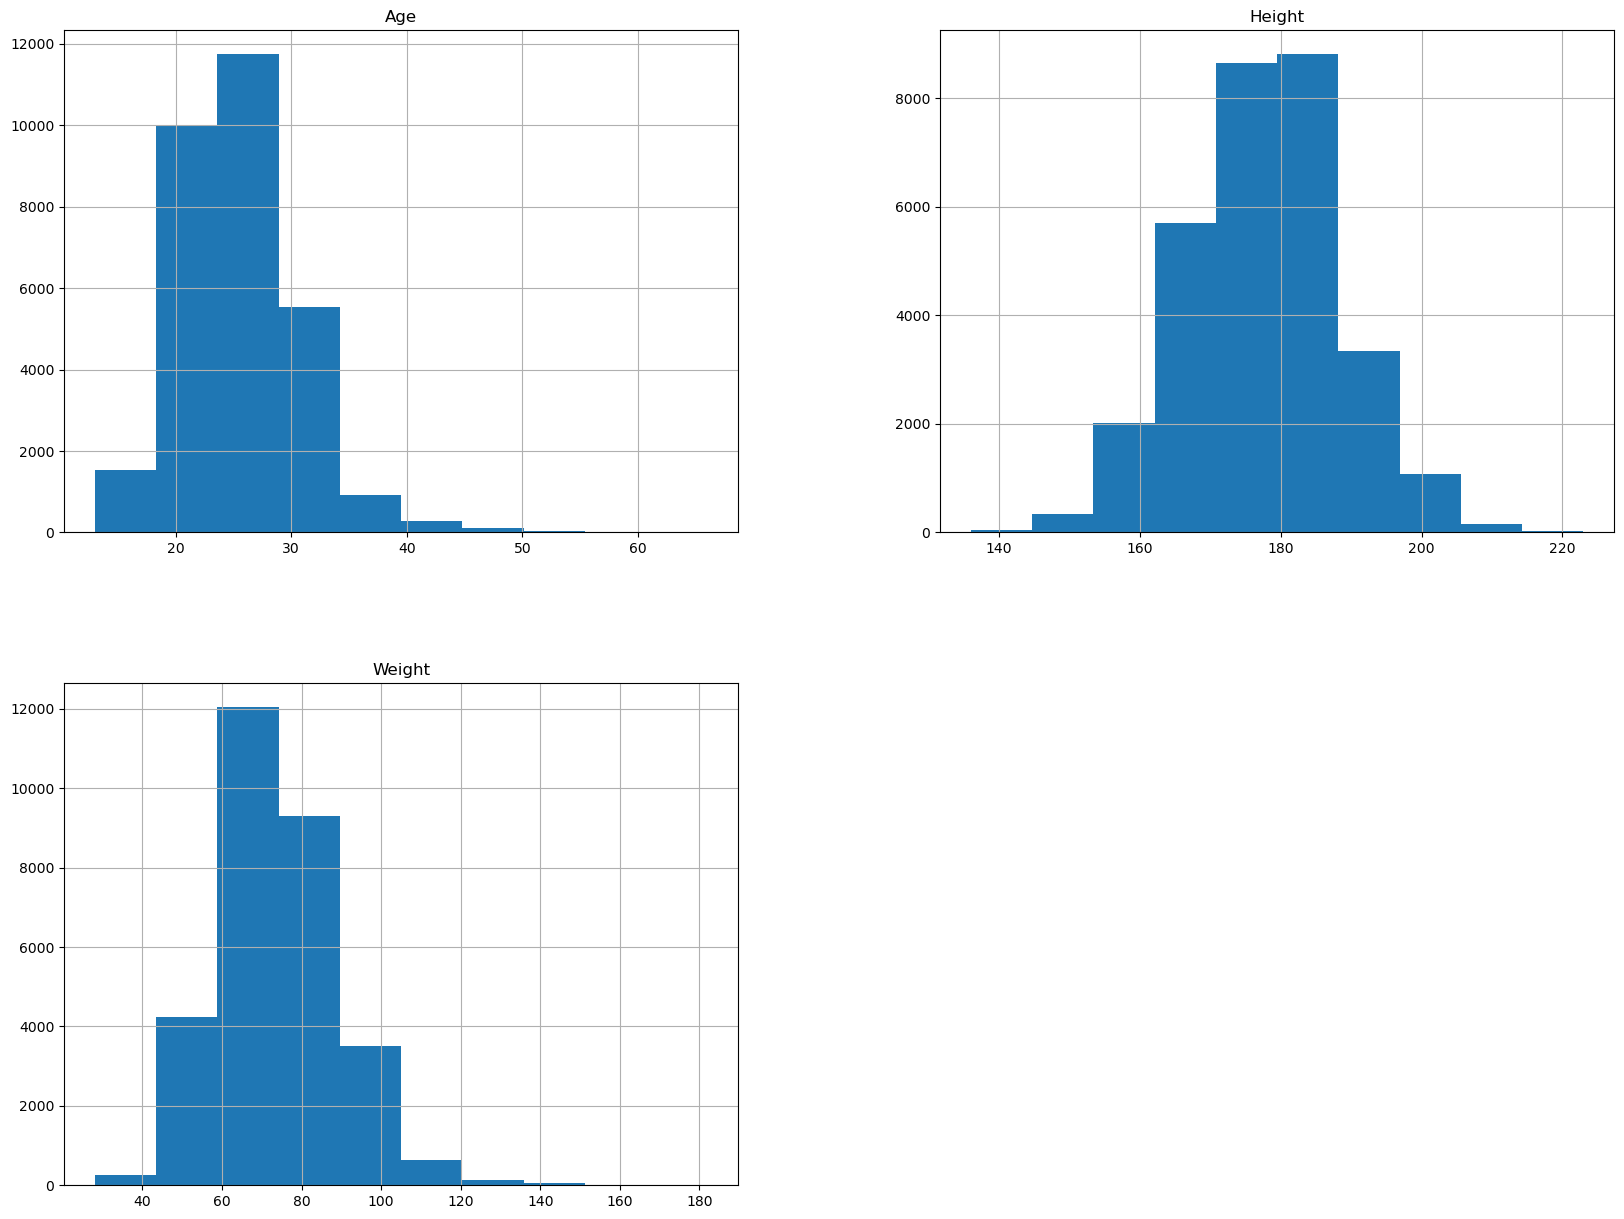

In [158]:
df_histograph = df.drop(['ID', 'Gold', 'Silver', 'Bronze', 'Year'], axis=1)
df_histograph = df_histograph.dropna()
df_histograph.hist(figsize=(20,15))
plt.show()

### Countplot of male vs. female competitors

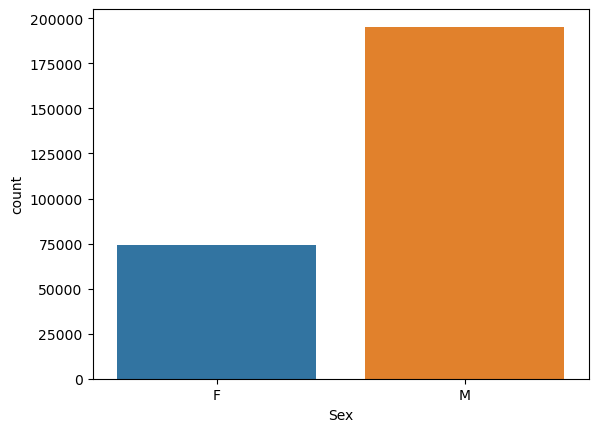

In [161]:
sns.countplot(x='Sex',data=df);